In [57]:
import xtgeo

In [2]:
import numpy as np
import pandas as pd

def read_grdecl_section(filename, keyword):
    """Read a specific section from GRDECL file"""
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    data = []
    capture = False
    for line in lines:
        if line.strip().startswith(keyword):
            capture = True
            continue
        if capture and line.strip().startswith('/'):
            break
        if capture and line.strip():
            # Parse numbers from line
            numbers = line.strip().split()
            for num in numbers:
                if '/' not in num:  # Skip comments
                    try:
                        data.append(float(num))
                    except ValueError:
                        pass
    return np.array(data)

# Explore different sections
# poro = read_grdecl_section(r'C:\Users\hesal5042\Downloads\NOFAULT_MODEL_R1.grdecl', 'PORO')
# permx = read_grdecl_section(r'C:\Users\hesal5042\Downloads\NOFAULT_MODEL_R1.grdecl', 'PERMX')


poro = read_grdecl_section(r'C:\Users\hesal5042\Downloads\50x50x50_Box_Singlefile.grdecl', 'PORO')
permx = read_grdecl_section(r'C:\Users\hesal5042\Downloads\50x50x50_Box_Singlefile.grdecl', 'PERMX')



Keywords found: {'ACTNUM', 'FORMFACT', 'GRIDUNIT', 'CHANNEL', 'MAPUNITS', 'CONNECT', 'SPECGRID', 'NOECHO', 'INC', 'MAPAXES', 'COORD', 'ECHO', 'GDORIENT', 'RESIST', 'PORO', 'ZCORN'}
PORO data: 125000 values
PORO range: 0.0201 - 0.3800


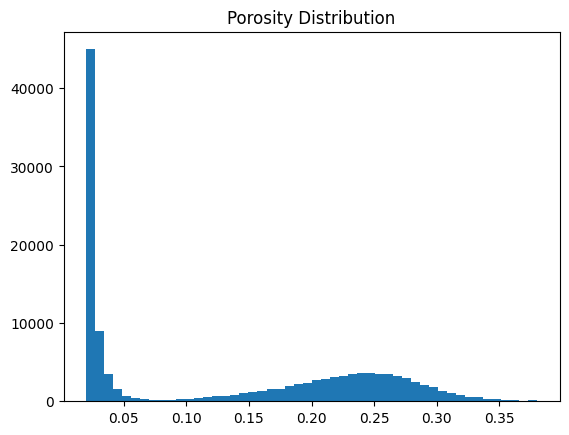

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def parse_grdecl_simple(filename, keyword):
    """Simple parser for GRDECL files"""
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    data = []
    capturing = False
    
    for line in lines:
        line = line.strip()
        
        # Start capturing when we find the keyword
        if line.upper().startswith(keyword):
            capturing = True
            continue
            
        # Stop capturing when we hit the next keyword or end marker
        if capturing and (line.startswith('/') or 
                         any(line.startswith(kw) for kw in ['PORO', 'PERM', 'COORD', 'ZCORN', 'ACTNUM'])):
            break
            
        if capturing and line and not line.startswith('--'):  # Skip comments
            # Handle both space and comma separated values
            values = line.replace(',', ' ').split()
            for val in values:
                if val != '/' and not val.startswith('--'):
                    try:
                        data.append(float(val))
                    except ValueError:
                        pass  # Skip non-numeric values
    
    return np.array(data)

# Usage example
filename = r'C:\Users\hesal5042\Downloads\50x50x50_Box_Singlefile.grdecl'

# First, let's see what's in the file
with open(filename, 'r') as f:
    content = f.read()
    
    # Find all keywords
    import re
    keywords = re.findall(r'^[A-Z]+', content, re.MULTILINE)
    print("Keywords found:", set(keywords))

# Explore a specific property
if 'PORO' in content:
    poro = parse_grdecl_simple(filename, 'PORO')
    print(f"PORO data: {len(poro)} values")
    print(f"PORO range: {poro.min():.4f} - {poro.max():.4f}")
    
    plt.hist(poro, bins=50)
    plt.title('Porosity Distribution')
    plt.show()


--- POROSITY Analysis ---
Min: 0.0200519003
Max: 0.379999995
Mean: 0.1322988413629192
Std: 0.10956735208542066


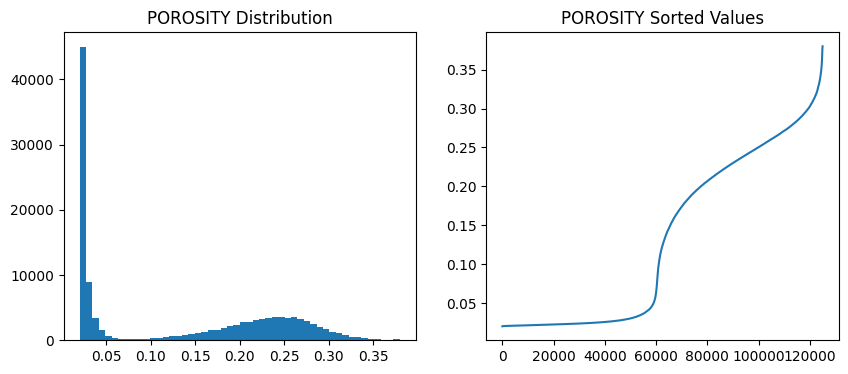

In [4]:
import matplotlib.pyplot as plt

def analyze_property(data, property_name):
    print(f"\n--- {property_name} Analysis ---")
    print(f"Min: {data.min()}")
    print(f"Max: {data.max()}")
    print(f"Mean: {data.mean()}")
    print(f"Std: {data.std()}")
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=50)
    plt.title(f'{property_name} Distribution')
    
    plt.subplot(1, 2, 2)
    plt.plot(sorted(data))
    plt.title(f'{property_name} Sorted Values')
    plt.show()

analyze_property(poro, 'POROSITY')

In [5]:
# Using pyres for basic visualization
try:
    import pyres
    grid = pyres.Grid.from_grdecl(filename)
    grid.visualize_property('PORO')
except ImportError:
    print("pyres not available")

pyres not available


In [15]:
# Look for SPECGRID or DIMENS keyword
def print_specgrid(filepath):
    with open(filepath, "r") as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "SPECGRID" in line.upper():
            # The next line usually has the dimensions before the slash
            next_line = lines[i + 1]
            print("SPECGRID line:", next_line.strip())

            # Parse numbers
            parts = next_line.split('/')
            numbers = parts[0].split()
            if len(numbers) >= 3:
                nx, ny, nz = map(int, numbers[:3])
                print(f"Grid dimensions:\n  NX = {nx}\n  NY = {ny}\n  NZ = {nz}")
            else:
                print("Could not parse SPECGRID numbers correctly.")
            return

    print("❌ SPECGRID section not found in file.")

# Example usage:
print_specgrid(filename)


SPECGRID line: 50  50  50   1  F  /
Grid dimensions:
  NX = 50
  NY = 50
  NZ = 50


In [7]:
properties = ['PORO', 'PERMX', 'PERMY', 'PERMZ', 'NTG', 'SATNUM']
with open(filename, 'r') as f:
    content = f.read()
    for prop in properties:
        if prop in content:
            print(f"Found: {prop}")

Found: PORO


Exploring: C:\Users\hesal5042\Downloads\50x50x50_Box_Singlefile.grdecl
Found keywords: ['ACTNUM', 'FORMFACT', 'GRIDUNIT', 'CHANNEL', 'MAPUNITS', 'CONNECT', 'SPECGRID', 'NOECHO', 'INC', 'MAPAXES', 'COORD', 'ECHO', 'GDORIENT', 'RESIST', 'PORO', 'ZCORN']

ACTNUM:
  Count: 125000
  Range: 1.000000 - 1.000000
  Mean:  1.000000


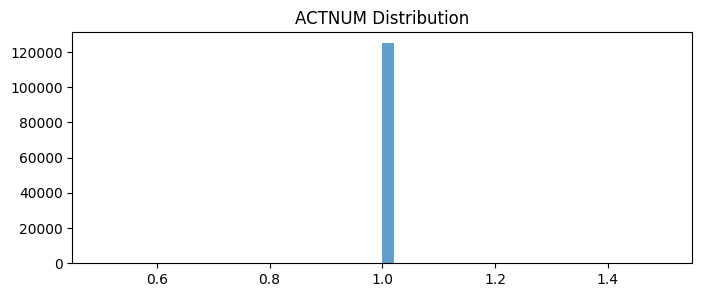


FORMFACT:
  Count: 125000
  Range: 4.622475 - 921.732666
  Mean:  315.660149


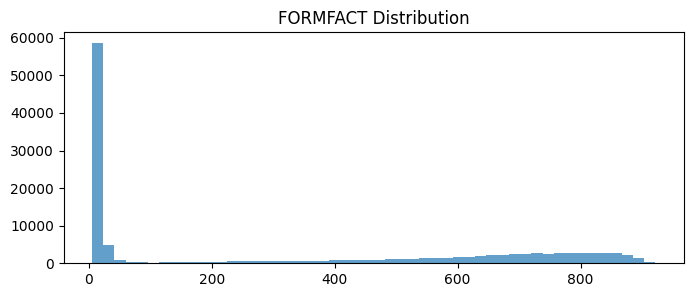


CHANNEL:
  Count: 125000
  Range: 0.000000 - 2.000000
  Mean:  0.579824


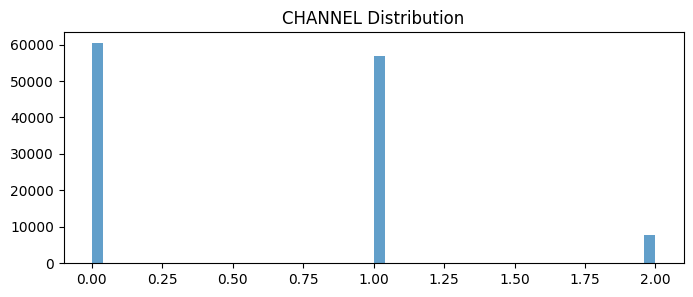


CONNECT:
  Count: 125000
  Range: 0.000000 - 2.000000
  Mean:  0.909312


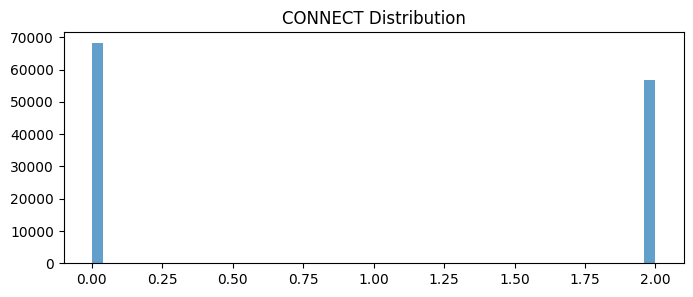


MAPAXES:
  Count: 6
  Range: -0.001000 - 4000.009000
  Mean:  833.334500


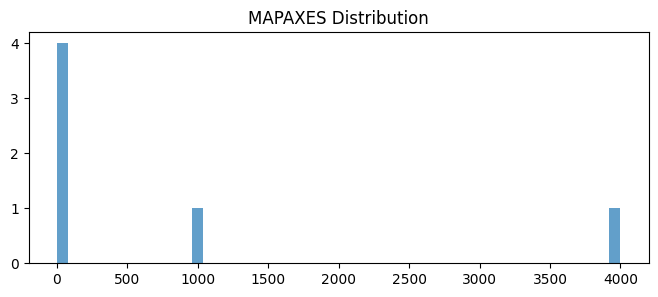


RESIST:
  Count: 125000
  Range: 1.386742 - 276.519806
  Mean:  94.698049


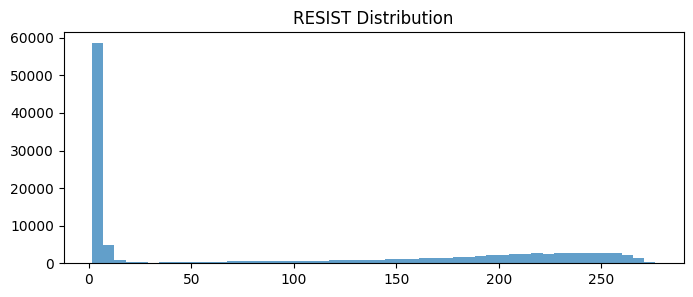


PORO:
  Count: 125000
  Range: 0.020052 - 0.380000
  Mean:  0.132299


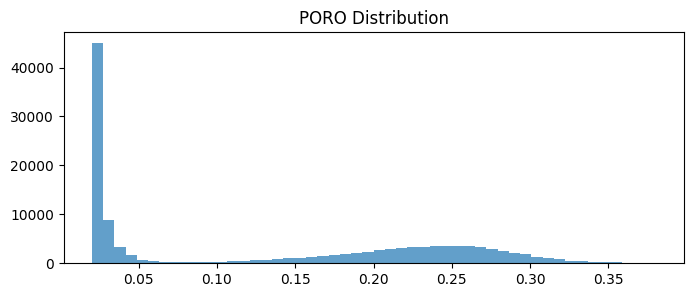

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re

class GRDECLExplorer:
    def __init__(self, filename):
        self.filename = filename
        self.keywords = self.find_keywords()
        
    def find_keywords(self):
        """Find all GRDECL keywords in the file"""
        with open(self.filename, 'r') as f:
            content = f.read()
            
        # Find all uppercase keywords at start of lines
        keywords = re.findall(r'^\s*([A-Z]+)\s*', content, re.MULTILINE)
        return list(set(keywords))
    
    def get_keyword_data(self, keyword):
        """Extract data for a specific keyword"""
        data = []
        capturing = False
        
        with open(self.filename, 'r') as f:
            for line in f:
                line = line.strip()
                
                if line.upper().startswith(keyword):
                    capturing = True
                    # Skip the keyword line itself
                    continue
                    
                if capturing and (line.startswith('/') or 
                                 any(line.upper().startswith(kw) for kw in self.keywords if kw != keyword)):
                    break
                    
                if capturing and line and not line.startswith('--'):
                    values = re.findall(r'[-+]?\d*\.?\d+', line)
                    data.extend([float(v) for v in values])
        
        return np.array(data)
    
    def explore(self):
        """Comprehensive exploration of the GRDECL file"""
        print(f"Exploring: {self.filename}")
        print(f"Found keywords: {self.keywords}")
        
        for keyword in self.keywords:
            if keyword not in ['SPECGRID', 'COORD', 'ZCORN']:  # Skip structural keywords for now
                data = self.get_keyword_data(keyword)
                if len(data) > 0:
                    print(f"\n{keyword}:")
                    print(f"  Count: {len(data)}")
                    print(f"  Range: {data.min():.6f} - {data.max():.6f}")
                    print(f"  Mean:  {data.mean():.6f}")
                    
                    # Quick plot for numeric data
                    if len(data) > 1:
                        plt.figure(figsize=(8, 3))
                        plt.hist(data, bins=50, alpha=0.7)
                        plt.title(f'{keyword} Distribution')
                        plt.show()

# Usage
explorer = GRDECLExplorer(filename)
explorer.explore()

Initializing reservoir analysis...
Loading properties...
Loaded PORO: 125000 values
Loaded ACTNUM: 125000 values
Analyzing grid structure...

=== GRID STRUCTURE ANALYSIS ===
Total cells: 125,000
Possible grid dimensions: 50 × 50 × 50 = 125,000
Analyzing properties...

=== PROPERTY ANALYSIS ===
POROSITY:
  Range: 0.020 - 0.380
  Mean:  0.132
  Std:   0.110
  P10:   0.022
  P50:   0.124
  P90:   0.277

  Porosity Quality:
  Excellent (>20%): 38.0%
  Good (12-20%):    12.3%
  Fair (8-12%):     1.4%
  Poor (≤8%):       48.4%
Creating visualizations...

=== CREATING VISUALIZATIONS ===


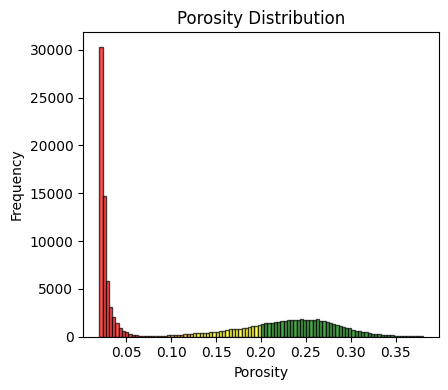

Exporting statistics...

Summary statistics exported to 'reservoir_summary.csv'

=== ANALYSIS COMPLETE ===


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

class ReservoirAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.keywords = self.find_keywords()
        self.data = {}
        
    def find_keywords(self):
        with open(self.filename, 'r') as f:
            content = f.read()
        keywords = re.findall(r'^\s*([A-Z]+)\s*', content, re.MULTILINE)
        return list(set(keywords))
    
    def load_all_properties(self):
        """Load all major properties into memory"""
        properties_to_load = ['PORO', 'FACIES', 'ACTNUM', 'R', 'C', 'F']
        
        for prop in properties_to_load:
            if prop in self.keywords:
                self.data[prop] = self.get_keyword_data(prop)
                print(f"Loaded {prop}: {len(self.data[prop])} values")
    
    def get_keyword_data(self, keyword):
        """Extract data for a specific keyword"""
        data = []
        capturing = False
        
        with open(self.filename, 'r') as f:
            for line in f:
                line = line.strip()
                
                if line.upper().startswith(keyword):
                    capturing = True
                    continue
                    
                if capturing and (line.startswith('/') or 
                                 any(line.upper().startswith(kw) for kw in self.keywords if kw != keyword)):
                    break
                    
                if capturing and line and not line.startswith('--'):
                    values = re.findall(r'[-+]?\d*\.?\d+', line)
                    data.extend([float(v) for v in values])
        
        return np.array(data)
    
    def analyze_grid_structure(self):
        """Analyze the grid dimensions and structure"""
        print("\n=== GRID STRUCTURE ANALYSIS ===")
        
        # Try to infer grid dimensions
        total_cells = len(self.data.get('PORO', []))
        print(f"Total cells: {total_cells:,}")
        
        # Common reservoir grid dimensions
        possible_dims = [
            (50, 50, 50), 
            # (200, 200, 400), 
            # (400, 100, 400), (160, 100, 1000)
        ]
        
        for nx, ny, nz in possible_dims:
            if nx * ny * nz == total_cells:
                print(f"Possible grid dimensions: {nx} × {ny} × {nz} = {total_cells:,}")
                self.dims = (nx, ny, nz)
                break
        else:
            print("Could not determine exact grid dimensions")
            self.dims = None
    
    def analyze_properties(self):
        """Detailed analysis of reservoir properties"""
        print("\n=== PROPERTY ANALYSIS ===")
        
        if 'PORO' in self.data:
            poro = self.data['PORO']
            print(f"POROSITY:")
            print(f"  Range: {poro.min():.3f} - {poro.max():.3f}")
            print(f"  Mean:  {poro.mean():.3f}")
            print(f"  Std:   {poro.std():.3f}")
            print(f"  P10:   {np.percentile(poro, 10):.3f}")
            print(f"  P50:   {np.percentile(poro, 50):.3f}")
            print(f"  P90:   {np.percentile(poro, 90):.3f}")
            
            # Porosity classification
            excellent = np.sum(poro > 0.20) / len(poro) * 100
            good = np.sum((poro > 0.12) & (poro <= 0.20)) / len(poro) * 100
            fair = np.sum((poro > 0.08) & (poro <= 0.12)) / len(poro) * 100
            poor = np.sum(poro <= 0.08) / len(poro) * 100
            
            print(f"\n  Porosity Quality:")
            print(f"  Excellent (>20%): {excellent:.1f}%")
            print(f"  Good (12-20%):    {good:.1f}%")
            print(f"  Fair (8-12%):     {fair:.1f}%")
            print(f"  Poor (≤8%):       {poor:.1f}%")
        
        if 'FACIES' in self.data:
            facies = self.data['FACIES']
            unique_facies = np.unique(facies)
            print(f"\nFACIES:")
            print(f"  Unique values: {unique_facies}")
            for facies_code in unique_facies:
                count = np.sum(facies == facies_code)
                percentage = count / len(facies) * 100
                print(f"  Facies {int(facies_code)}: {count:,} cells ({percentage:.1f}%)")
    
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("\n=== CREATING VISUALIZATIONS ===")
        
        # 1. Porosity histogram with quality zones
        if 'PORO' in self.data:
            plt.figure(figsize=(12, 4))
            
            poro = self.data['PORO']
            
            plt.subplot(1, 3, 1)
            n, bins, patches = plt.hist(poro, bins=100, alpha=0.7, color='blue', edgecolor='black')
            plt.xlabel('Porosity')
            plt.ylabel('Frequency')
            plt.title('Porosity Distribution')
            
            # Color code porosity quality
            colors = ['red', 'orange', 'yellow', 'green']
            quality_ranges = [0, 0.08, 0.12, 0.20, 0.38]
            for i in range(len(quality_ranges)-1):
                mask = (bins[:-1] >= quality_ranges[i]) & (bins[:-1] < quality_ranges[i+1])
                for j in range(len(patches)):
                    if mask[j] if j < len(mask) else False:
                        patches[j].set_facecolor(colors[i])
            
            # 2. Facies distribution
            if 'FACIES' in self.data:
                plt.subplot(1, 3, 2)
                facies = self.data['FACIES']
                unique_facies = np.unique(facies)
                facies_counts = [np.sum(facies == code) for code in unique_facies]
                
                plt.pie(facies_counts, labels=[f'Facies {int(code)}' for code in unique_facies], 
                        autopct='%1.1f%%', startangle=90)
                plt.title('Facies Distribution')
            
            # 3. Property correlation
            if 'FACIES' in self.data and 'PORO' in self.data:
                plt.subplot(1, 3, 3)
                facies = self.data['FACIES']
                poro = self.data['PORO']
                
                # Sample every 1000th point for performance
                sample_idx = np.random.choice(len(poro), min(10000, len(poro)), replace=False)
                
                for facies_code in np.unique(facies):
                    mask = (facies[sample_idx] == facies_code)
                    plt.hist(poro[sample_idx][mask], bins=30, alpha=0.6, 
                            label=f'Facies {int(facies_code)}', density=True)
                
                plt.xlabel('Porosity')
                plt.ylabel('Density')
                plt.title('Porosity by Facies')
                plt.legend()
            
            plt.tight_layout()
            plt.show()
    
    def export_summary_statistics(self):
        """Export key statistics to CSV"""
        summary_data = []
        
        for prop in ['PORO', 'FACIES']:
            if prop in self.data:
                data = self.data[prop]
                stats = {
                    'Property': prop,
                    'Count': len(data),
                    'Min': data.min(),
                    'Max': data.max(),
                    'Mean': data.mean(),
                    'Std': data.std(),
                    'P10': np.percentile(data, 10),
                    'P50': np.percentile(data, 50),
                    'P90': np.percentile(data, 90)
                }
                summary_data.append(stats)
        
        df = pd.DataFrame(summary_data)
        df.to_csv('reservoir_summary.csv', index=False)
        print("\nSummary statistics exported to 'reservoir_summary.csv'")
        
        return df

# Run the analysis
import re

print("Initializing reservoir analysis...")
analyzer = ReservoirAnalyzer('C:\\Users\\hesal5042\\Downloads\\50x50x50_Box_Singlefile.grdecl')

print("Loading properties...")
analyzer.load_all_properties()

print("Analyzing grid structure...")
analyzer.analyze_grid_structure()

print("Analyzing properties...")
analyzer.analyze_properties()

print("Creating visualizations...")
analyzer.create_visualizations()

print("Exporting statistics...")
summary_df = analyzer.export_summary_statistics()

print("\n=== ANALYSIS COMPLETE ===")

IndexError: index 50 is out of bounds for axis 0 with size 50

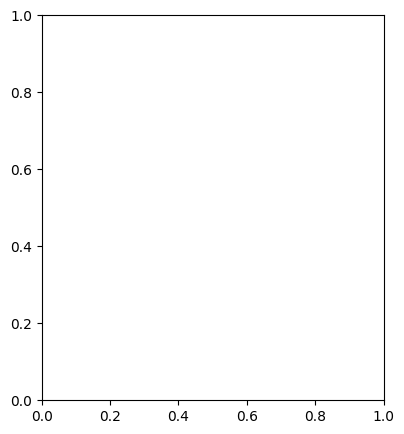

In [17]:
# For 3D visualization (if you want to see spatial distribution)
def create_2d_slices(analyzer, layer=0):
    """Create 2D slice visualizations"""
    if analyzer.dims:
        nx, ny, nz = analyzer.dims
        poro_3d = analyzer.data['PORO'].reshape(nz, ny, nx)
        
        plt.figure(figsize=(15, 5))
        
        # Top view (map view)
        plt.subplot(1, 3, 1)
        plt.imshow(poro_3d[layer, :, :], cmap='viridis', origin='lower')
        plt.colorbar(label='Porosity')
        plt.title(f'Layer {layer} - Map View')
        
        # Cross-section X
        plt.subplot(1, 3, 2)
        plt.imshow(poro_3d[:, :, nx//2], cmap='viridis', aspect='auto')
        plt.colorbar(label='Porosity')
        plt.title('Cross-section X')
        
        # Cross-section Y
        plt.subplot(1, 3, 3)
        plt.imshow(poro_3d[:, ny//2, :], cmap='viridis', aspect='auto')
        plt.colorbar(label='Porosity')
        plt.title('Cross-section Y')
        
        plt.tight_layout()
        plt.show()

# Try this if you determine the grid dimensions
create_2d_slices(analyzer, layer=50)

Initializing advanced GRDECL analysis...
NOECHO       starts at line        1
MAPUNITS     starts at line       11
MAPAXES      starts at line       14
GRIDUNIT     starts at line       19
SPECGRID     starts at line       22
GDORIENT     starts at line       25
INC          starts at line       26
COORD        starts at line       28
ZCORN        starts at line     2632
ACTNUM       starts at line   172634
PORO         starts at line   177638
FORMFACT     starts at line   205141
CHANNEL      starts at line   232644
CONNECT      starts at line   260147
RESIST       starts at line   287650
ECHO         starts at line   315153

Analyzing file structure...

=== FILE STRUCTURE ANALYSIS ===
COORD section: lines 28 to 2631 (2,604 lines)
ZCORN section: lines 2632 to 177637 (175,006 lines)
PORO section:  lines 177638 to 38000554 (37,822,916 lines)

Estimated data points:
COORD: ~15,624 values (6 values per line typical)
ZCORN: ~700,024 values (4 values per line typical)
PORO:  ~302,583,328 val

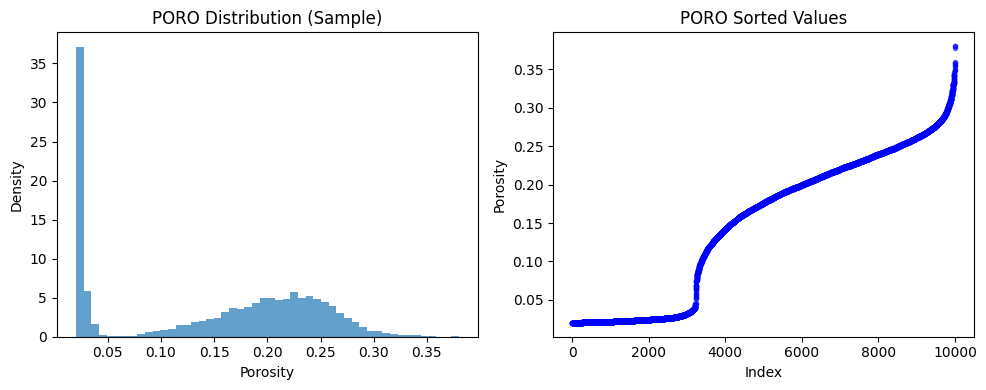

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

class AdvancedGRDECLAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.keyword_positions = self.find_keyword_positions()
        
    def find_keyword_positions(self):
        """Find exact line numbers for each keyword"""
        keyword_lines = {}
        with open(self.filename, 'r') as f:
            for line_num, line in enumerate(f, 1):
                line = line.strip()
                # Match keywords at start of line
                match = re.match(r'^\s*([A-Z]+)\s*', line)
                if match:
                    keyword = match.group(1)
                    if keyword not in keyword_lines:
                        keyword_lines[keyword] = line_num
                        print(f"{keyword:12} starts at line {line_num:>8}")
        return keyword_lines
    
    def read_large_section(self, start_line, end_keyword=None, max_lines=None):
        """Efficiently read large data sections"""
        data = []
        current_line = 0
        capturing = False
        
        with open(self.filename, 'r') as f:
            for line_num, line in enumerate(f, 1):
                if line_num < start_line:
                    continue
                    
                line = line.strip()
                
                # Start capturing at the target line
                if line_num == start_line:
                    capturing = True
                    continue
                
                # Stop conditions
                if capturing:
                    if end_keyword and re.match(r'^\s*' + end_keyword + r'\s*', line):
                        break
                    if line.startswith('/'):
                        break
                    if max_lines and len(data) >= max_lines:
                        break
                    
                    # Parse numbers
                    if line and not line.startswith('--'):
                        values = re.findall(r'[-+]?\d*\.?\d+[eE]?[-+]?\d*', line)
                        data.extend([float(v) for v in values])
        
        return np.array(data)
    
    def analyze_file_structure(self):
        """Analyze the overall file structure"""
        print("\n=== FILE STRUCTURE ANALYSIS ===")
        total_lines = 38000554  # From your count
        
        # Calculate section sizes
        coord_size = self.keyword_positions['ZCORN'] - self.keyword_positions['COORD']
        zcorn_size = self.keyword_positions['PORO'] - self.keyword_positions['ZCORN']
        poro_size = total_lines - self.keyword_positions['PORO']
        
        print(f"COORD section: lines {self.keyword_positions['COORD']} to {self.keyword_positions['ZCORN']-1} ({coord_size:,} lines)")
        print(f"ZCORN section: lines {self.keyword_positions['ZCORN']} to {self.keyword_positions['PORO']-1} ({zcorn_size:,} lines)")
        print(f"PORO section:  lines {self.keyword_positions['PORO']} to {total_lines} ({poro_size:,} lines)")
        
        # Estimate data sizes
        print(f"\nEstimated data points:")
        print(f"COORD: ~{coord_size * 6:,} values (6 values per line typical)")
        print(f"ZCORN: ~{zcorn_size * 4:,} values (4 values per line typical)")
        print(f"PORO:  ~{poro_size * 8:,} values (8 values per line typical)")
    
    def quick_property_analysis(self, sample_size=1000000):
        """Quick analysis without loading everything"""
        print("\n=== QUICK PROPERTY ANALYSIS ===")
        
        # Sample PORO data
        poro_sample = self.read_large_section(
            self.keyword_positions['PORO'], 
            end_keyword=None,  # Read until end of section
            max_lines=10000    # Sample first 10k lines
        )
        
        print(f"PORO sample: {len(poro_sample):,} values")
        if len(poro_sample) > 0:
            print(f"  Range: {poro_sample.min():.4f} - {poro_sample.max():.4f}")
            print(f"  Mean:  {poro_sample.mean():.4f}")
            
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.hist(poro_sample, bins=50, alpha=0.7, density=True)
            plt.title('PORO Distribution (Sample)')
            plt.xlabel('Porosity')
            plt.ylabel('Density')
            
            plt.subplot(1, 2, 2)
            plt.plot(sorted(poro_sample), 'b.', alpha=0.5)
            plt.title('PORO Sorted Values')
            plt.xlabel('Index')
            plt.ylabel('Porosity')
            plt.tight_layout()
            plt.show()
    
    def extract_grid_dimensions(self):
        """Extract SPECGRID information"""
        print("\n=== GRID DIMENSIONS ===")
        
        specgrid_data = self.read_large_section(
            self.keyword_positions['SPECGRID'],
            end_keyword=None,
            max_lines=2
        )
        
        if len(specgrid_data) >= 3:
            nx, ny, nz = int(specgrid_data[0]), int(specgrid_data[1]), int(specgrid_data[2])
            total_cells = nx * ny * nz
            print(f"Grid dimensions: {nx} × {ny} × {nz} = {total_cells:,} cells")
            return (nx, ny, nz)
        else:
            print("Could not read SPECGRID dimensions")
            return None
    
    def analyze_coord_system(self):
        """Analyze coordinate system and units"""
        print("\n=== COORDINATE SYSTEM ===")
        
        # Check for MAPAXES
        if 'MAPAXES' in self.keyword_positions:
            mapaxes = self.read_large_section(
                self.keyword_positions['MAPAXES'],
                end_keyword=None,
                max_lines=2
            )
            if len(mapaxes) >= 6:
                print(f"MAPAXES: {mapaxes}")
        
        # Check for GRIDUNIT
        if 'GRIDUNIT' in self.keyword_positions:
            gridunit_lines = []
            with open(self.filename, 'r') as f:
                for line_num, line in enumerate(f, 1):
                    if line_num == self.keyword_positions['GRIDUNIT']:
                        gridunit_lines.append(line.strip())
                    elif line_num > self.keyword_positions['GRIDUNIT'] and len(gridunit_lines) < 3:
                        gridunit_lines.append(line.strip())
                    elif len(gridunit_lines) >= 3:
                        break
            print(f"GRIDUNIT: {gridunit_lines}")

# Run the advanced analysis
print("Initializing advanced GRDECL analysis...")
analyzer = AdvancedGRDECLAnalyzer('C:\\Users\\hesal5042\\Downloads\\50x50x50_Box_Singlefile.grdecl')

print("\nAnalyzing file structure...")
analyzer.analyze_file_structure()

print("\nExtracting grid dimensions...")
dims = analyzer.extract_grid_dimensions()

print("\nAnalyzing coordinate system...")
analyzer.analyze_coord_system()

print("\nQuick property analysis...")
analyzer.quick_property_analysis()

In [19]:
def process_large_grdecl_chunks(filename, keyword, chunk_size=1000000):
    """Process very large GRDECL files in chunks"""
    print(f"Processing {keyword} in chunks...")
    
    # Find keyword position first
    keyword_line = None
    with open(filename, 'r') as f:
        for line_num, line in enumerate(f, 1):
            if line.strip().startswith(keyword):
                keyword_line = line_num
                break
    
    if not keyword_line:
        print(f"Keyword {keyword} not found")
        return
    
    # Process in chunks
    all_stats = []
    chunk_count = 0
    current_chunk = []
    
    with open(filename, 'r') as f:
        for line_num, line in enumerate(f, 1):
            if line_num <= keyword_line:
                continue
                
            line = line.strip()
            
            # Stop at next keyword or end marker
            if line.startswith('/') or re.match(r'^\s*[A-Z]+\s*', line):
                break
                
            if line and not line.startswith('--'):
                values = re.findall(r'[-+]?\d*\.?\d+[eE]?[-+]?\d*', line)
                current_chunk.extend([float(v) for v in values])
                
                if len(current_chunk) >= chunk_size:
                    chunk_array = np.array(current_chunk)
                    stats = {
                        'chunk': chunk_count,
                        'min': chunk_array.min(),
                        'max': chunk_array.max(),
                        'mean': chunk_array.mean(),
                        'count': len(chunk_array)
                    }
                    all_stats.append(stats)
                    print(f"Chunk {chunk_count}: {stats}")
                    
                    current_chunk = []
                    chunk_count += 1
    
    # Process final chunk
    if current_chunk:
        chunk_array = np.array(current_chunk)
        stats = {
            'chunk': chunk_count,
            'min': chunk_array.min(),
            'max': chunk_array.max(),
            'mean': chunk_array.mean(),
            'count': len(chunk_array)
        }
        all_stats.append(stats)
        print(f"Final chunk {chunk_count}: {stats}")
    
    return pd.DataFrame(all_stats)

# Use this for memory-efficient processing
poro_stats = process_large_grdecl_chunks(filename, 'PORO')

Processing PORO in chunks...
Final chunk 0: {'chunk': 0, 'min': 0.0200519003, 'max': 0.379999995, 'mean': 0.1322988413629192, 'count': 125000}


Initializing analyzer...
Loading real porosity data...
Loaded 125,000 real porosity values
Reshaped to 3D: (50, 50, 50)


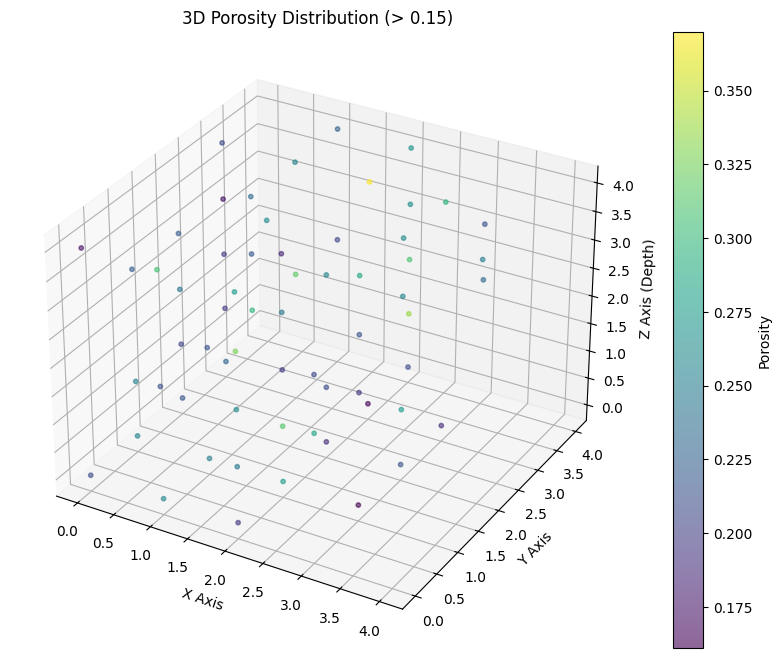

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import re

# === 1. ANALYZER CLASS ===
class AdvancedGRDECLAnalyzer:
    def __init__(self, filename):
        self.filename = filename
        self.keyword_positions = self.find_keyword_positions()
        
    def find_keyword_positions(self):
        keyword_lines = {}
        with open(self.filename, 'r') as f:
            for line_num, line in enumerate(f, 1):
                line = line.strip()
                match = re.match(r'^\s*([A-Z]+)\s*', line)
                if match:
                    keyword = match.group(1)
                    if keyword not in keyword_lines:
                        keyword_lines[keyword] = line_num
        return keyword_lines
    
    def get_keyword_data(self, keyword):
        data = []
        capturing = False
        with open(self.filename, 'r') as f:
            for line in f:
                line = line.strip()
                if line.upper().startswith(keyword):
                    capturing = True
                    continue
                if capturing and (line.startswith('/') or any(line.upper().startswith(kw) for kw in self.keyword_positions if kw != keyword)):
                    break
                if capturing and line and not line.startswith('--'):
                    values = re.findall(r'[-+]?\d*\.?\d+', line)
                    data.extend([float(v) for v in values])
        return np.array(data)

# === 2. CREATE ANALYZER ===
print("Initializing analyzer...")
analyzer = AdvancedGRDECLAnalyzer('C:\\Users\\hesal5042\\Downloads\\50x50x50_Box_Singlefile.grdecl')

# === 3. YOUR 3D VISUALIZATION FUNCTIONS ===
def load_real_porosity_data(analyzer):
    print("Loading real porosity data...")
    poro_flat = analyzer.get_keyword_data('PORO')
    print(f"Loaded {len(poro_flat):,} real porosity values")
    poro_3d = poro_flat.reshape(50, 50, 50, order='F')
    print(f"Reshaped to 3D: {poro_3d.shape}")
    return poro_3d

def simple_3d_scatter(poro_3d, sample_rate=10, threshold=0.15):
    sampled = poro_3d[::sample_rate, ::sample_rate, ::sample_rate]
    mask = sampled > threshold
    z, y, x = np.where(mask)
    values = sampled[mask]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=values, cmap='viridis', s=10, alpha=0.6, marker='o')
    ax.set_xlabel('X Axis'); ax.set_ylabel('Y Axis'); ax.set_zlabel('Z Axis (Depth)')
    ax.set_title(f'3D Porosity Distribution (> {threshold})')
    plt.colorbar(scatter, label='Porosity')
    plt.show()

def plotly_3d_simple(poro_3d, sample_rate=4):
    sampled = poro_3d[::sample_rate, ::sample_rate, ::sample_rate]
    z, y, x = np.indices(sampled.shape)
    fig = go.Figure(data=go.Scatter3d(
        x=x.flatten(), y=y.flatten(), z=z.flatten(),
        mode='markers', marker=dict(size=3, color=sampled.flatten(), colorscale='Viridis', opacity=0.6)
    ))
    fig.update_layout(title='3D Reservoir Porosity', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z (Depth)'))
    fig.show()

# === 4. RUN EVERYTHING ===
poro_3d = load_real_porosity_data(analyzer)
simple_3d_scatter(poro_3d)
plotly_3d_simple(poro_3d)

In [22]:
def view_3d_structure_plotly(poro_3d, sample_rate=10):
    """Interactive 3D structure view"""
    
    sampled = poro_3d[::sample_rate, ::sample_rate, ::sample_rate]
    nz, ny, nx = sampled.shape
    
    # Get coordinates
    z, y, x = np.indices(sampled.shape)
    
    fig = go.Figure(data=go.Scatter3d(
        x=x.flatten(),
        y=y.flatten(), 
        z=z.flatten(),
        mode='markers',
        marker=dict(
            size=2,
            color='lightblue',  # Single color
            opacity=0.5
        ),
        name='Reservoir Cells'
    ))
    
    # Add bounding box
    fig.add_trace(go.Mesh3d(
        # 8 vertices of the cube
        x=[0, nx, nx, 0, 0, nx, nx, 0],
        y=[0, 0, ny, ny, 0, 0, ny, ny], 
        z=[0, 0, 0, 0, nz, nz, nz, nz],
        i=[7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j=[3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k=[0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        opacity=0.1,
        color='red'
    ))
    
    fig.update_layout(
        title='3D Reservoir Structure',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z (Depth)'
        )
    )
    
    fig.show()

view_3d_structure_plotly(poro_3d)

In [29]:
import numpy as np
print("Grid dimensions:", filename.nx, filename.ny, filename.nz)
print(dir(filename))

AttributeError: 'str' object has no attribute 'nx'

In [25]:
# import numpy as np

# poro = xtgeo.import_grdecl_prop(grdecl_file,grid)
# # perm = xtgeo.gridproperty_from_file(grdecl_file,name="PERM")
# poro.grid = grid


In [26]:
# import matplotlib.pyplot as plt

# # Extract the first layer of porosity
# poro_layer1 = poro.values['PORO'][0, :, :]

# plt.imshow(poro_layer1, cmap='viridis')
# plt.colorbar(label="Porosity")
# plt.title("Porosity Layer 1")
# plt.show()


In [27]:
# print("Number of active cells:", np.sum(grid.actnum))